<a href="https://colab.research.google.com/github/MarceloTisera/DiploDataScience/blob/master/Local_Practico1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico </h1>
<h3> Análisis y Visualización de Datos - 2020 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con un estimadores principal: *hf_score* que hace referencia a Human Freedom, que a su vez está calculado en base a dos otros estimadores *ef_score*, para Economic Freedom y *pf_score*, para Personal Freedom. Estos tres estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [0]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
import io

In [0]:
seaborn.__version__

'0.10.1'

Si un archivo está disponible en la web, podemos leerlo con pandas utilizando su URL sin necesidad de descargarlo.

In [0]:
#from google.colab import files
#uploaded = files.upload()

In [0]:
#print(uploaded.keys())

In [0]:
#file_key = 'human-freedom2019.csv'
#df_all = pandas.read_csv(io.StringIO(uploaded[file_key].decode('utf-8')))
df_all = pandas.read_csv('https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')

df_all.head(2)

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_association_association,pf_association_assembly,pf_association_political_establish,pf_association_political_operate,pf_association_political,pf_association_prof_establish,...,ef_legal,ef_money_growth,ef_money_sd,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2017,ALB,Albania,Eastern Europe,7.84,38,1,6.7,4.5,4.7,5.3,9.1,10,10,10,10,10,10,10,-,-,7.5,8.8,9.3,10,10,10,10,-,-,10,9.6,8,9.2,10,10,-,-,10,-,...,5.1,9.3,9.7,9.6,10,9.6,9.6,9.3,8.1,9,6,9.4,7.7,10,6.3,5.4,8.3,6.7,8.3,10,9.1,10,9.7,5.6,5.4,6.4,8,6.3,10,6.9,6.3,6.7,9.7,4.1,6,7.2,6.7,7.8,7.67,30
1,2017,DZA,Algeria,Middle East & North Africa,4.99,155,4,-,-,-,3.8,9.5,10,9.5,5,9.9,9.9,8.9,10,-,-,0,5,7.8,10,5,2.5,5.8,-,-,5,6.9,3,4.9,5,5,-,-,5,-,...,4.7,7,8.5,8.9,5,7.3,8.5,6.2,5.9,6.9,4.8,0.5,2.6,0,3.7,0,1.1,1.6,2.8,0,5.3,10,5.1,5.6,4.1,6,6,7.8,3,5.4,3.7,1.8,9.3,3.8,8.7,7,5.7,5.4,4.77,159


In [0]:
df_all.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'hf_score', 'hf_rank',
       'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_bureaucracy',
       'ef_regulation_business_start', 'ef_regulation_business_bribes',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=120)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [0]:
score_cols = [col for col in df_all.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols


In [0]:
df_all = df_all[important_cols]

Si analizamos los tipos, vemos que casi todas las columnas se leen como objetos debido a que los valores nulos están marcados con `-`. Los vamos a eliminar y volveremos a convertir las columnas con puntajes a tipo numérico.

In [0]:
df_all.dtypes

year                       int64
ISO_code                  object
countries                 object
region                    object
pf_identity_legal         object
pf_identity_sex_male      object
pf_identity_sex_female    object
pf_identity_sex           object
pf_identity_divorce       object
pf_identity               object
pf_score                  object
pf_rank                   object
ef_score                  object
ef_rank                   object
hf_score                  object
hf_rank                   object
dtype: object

######REMPLAZO DE VALORES '-' POR VALOR NULL (nan)

---
Utilizo el df_all que ya tiene filtrada las columnas importanes.
NO necesito indicarle al DF cuales son las columnas a remplazar - por nan


In [0]:
df_all = df_all.replace('-', numpy.nan)
for score_col in score_cols:
    df_all[score_col] = pandas.to_numeric(df_all[score_col])
df_all.tail()

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
1615,2008,AUS,Australia,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0
1616,2008,DNK,Denmark,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0
1617,2008,CHE,Switzerland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0
1619,2008,HKG,Hong Kong,East Asia,NaN,10.0,10.0,10.0,10.0,10.0,9.13,12.0,9.11,1.0,9.12,1.0


In [0]:
df_all.dtypes

year                        int64
ISO_code                   object
countries                  object
region                     object
pf_identity_legal         float64
pf_identity_sex_male      float64
pf_identity_sex_female    float64
pf_identity_sex           float64
pf_identity_divorce       float64
pf_identity               float64
pf_score                  float64
pf_rank                   float64
ef_score                  float64
ef_rank                   float64
hf_score                  float64
hf_rank                   float64
dtype: object

####Creo distintos DataFrame para separar sudamerica y argentina. 
* df_all = 100% de datos
* df_latin = dataset filtrado por region
* df_argentina = dataset de df_latin filtrado por pais = argentina


In [0]:
#regiones unicas en el set de datos
df_all.region.unique()

array(['Eastern Europe', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'Latin America & the Caribbean',
       'Caucasus & Central Asia', 'Oceania', 'Western Europe',
       'South Asia', 'North America', 'East Asia'], dtype=object)

In [0]:
#filtro datafreme de la region de latin america
df_latin = df_all[df_all.region == 'Latin America & the Caribbean']
df_latin.head(3)   


,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
8,2017,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,7.87,48.0,7.25,58.0,7.56,48.0
11,2017,BRD,Barbados,Latin America & the Caribbean,NaN,0.0,0.0,0.0,10.0,5.0,7.59,57.0,6.45,112.0,7.02,66.0


In [0]:
#Filtro dataframe de latin america para pais = argentina
df_argentina = df_latin[df_latin.countries == 'Argentina']
df_argentina.head(5)

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
165,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.10,45.0,5.40,151.0,6.75,85.0
327,2015,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.03,46.0,5.06,153.0,6.54,102.0
489,2014,ARG,Argentina,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,7.92,50.0,4.61,158.0,6.27,116.0
651,2013,ARG,Argentina,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,8.11,44.0,4.99,152.0,6.55,106.0


###Respuestas PARTE 1 ( Estadísticos descriptivos)
#####1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [0]:
#Rango de todas las columnas
df_all.describe()


,year,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
count,1620.000000,308.000000,1537.000000,1540.000000,1540.000000,1519.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000
mean,2012.500000,6.379870,6.701366,7.922078,7.314935,7.485188,7.280649,7.163409,77.671429,6.792981,77.420779,6.978214,77.465584
std,2.873168,3.640415,4.685828,4.038529,4.056317,3.502156,3.181577,1.392409,44.757695,0.906827,44.776169,1.056239,44.782074
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.220000,1.000000,2.580000,1.000000,3.690000,1.000000
25%,2010.000000,7.000000,0.000000,10.000000,5.000000,5.000000,5.000000,6.147500,39.000000,6.220000,39.000000,6.280000,39.000000
50%,2012.500000,7.000000,10.000000,10.000000,10.000000,10.000000,8.800000,7.145000,77.500000,6.880000,77.000000,6.900000,77.000000
75%,2015.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.380000,116.000000,7.440000,116.000000,7.880000,116.000000
max,2017.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.560000,162.000000,9.110000,162.000000,9.120000,162.000000


In [0]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    1620 non-null   int64  
 1   ISO_code                1620 non-null   object 
 2   countries               1620 non-null   object 
 3   region                  1620 non-null   object 
 4   pf_identity_legal       308 non-null    float64
 5   pf_identity_sex_male    1537 non-null   float64
 6   pf_identity_sex_female  1540 non-null   float64
 7   pf_identity_sex         1540 non-null   float64
 8   pf_identity_divorce     1519 non-null   float64
 9   pf_identity             1540 non-null   float64
 10  pf_score                1540 non-null   float64
 11  pf_rank                 1540 non-null   float64
 12  ef_score                1540 non-null   float64
 13  ef_rank                 1540 non-null   float64
 14  hf_score                1540 non-null   

2. Para cada país, tenemos varias realizaciones para cada variable pf_identity y hf_score. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana? 


In [0]:
#completar datos de pf_identity y hf_score

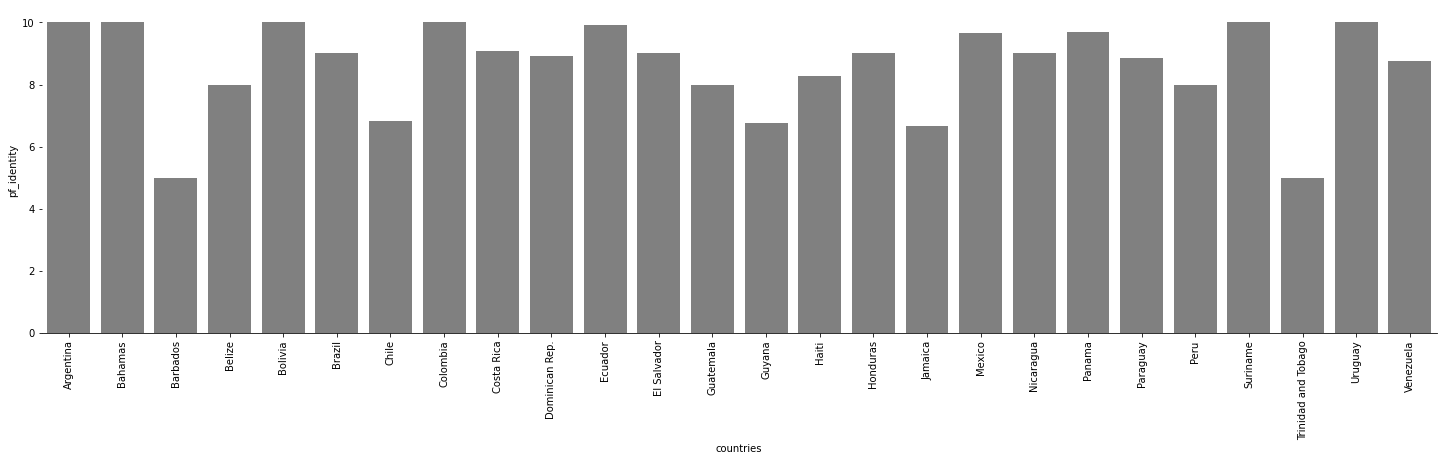

In [0]:
plt.figure(figsize=(25,6))
seaborn.barplot(data=df_latin ,x='countries',y='pf_identity', color='gray', ci=None)
plt.xticks(rotation=90)
seaborn.despine(left=True)

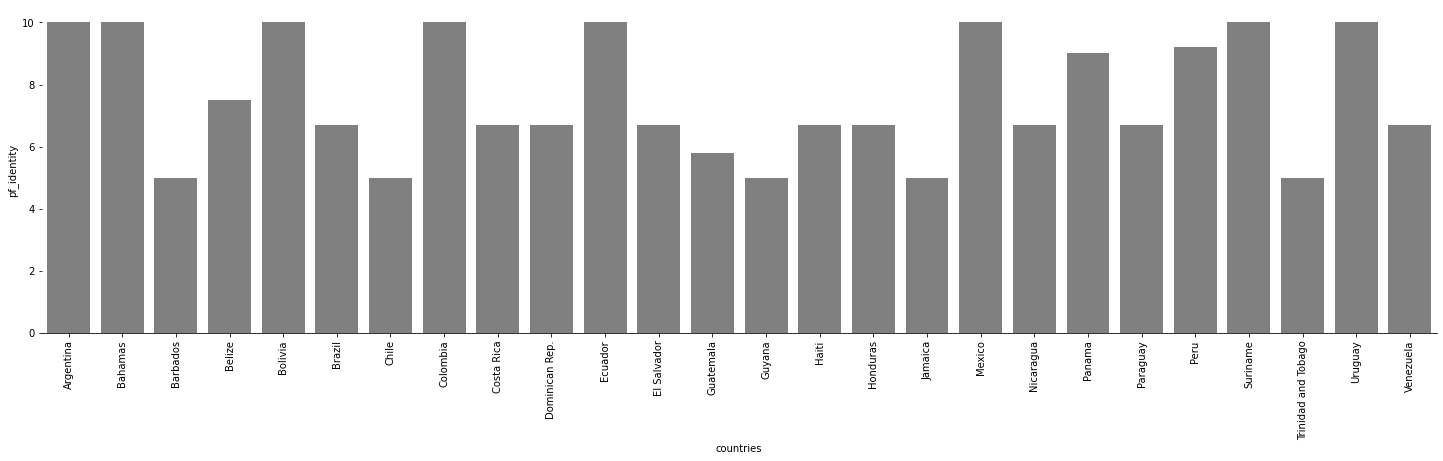

In [0]:
# filtro por año los datos 
# comparo paises de latinoamerica para wl año  2016
plt.figure(figsize=(25,6))
seaborn.barplot(data=df_latin.query('year == 2015') ,x='countries',y='pf_identity', color='gray')
plt.xticks(rotation=90)
seaborn.despine(left=True)

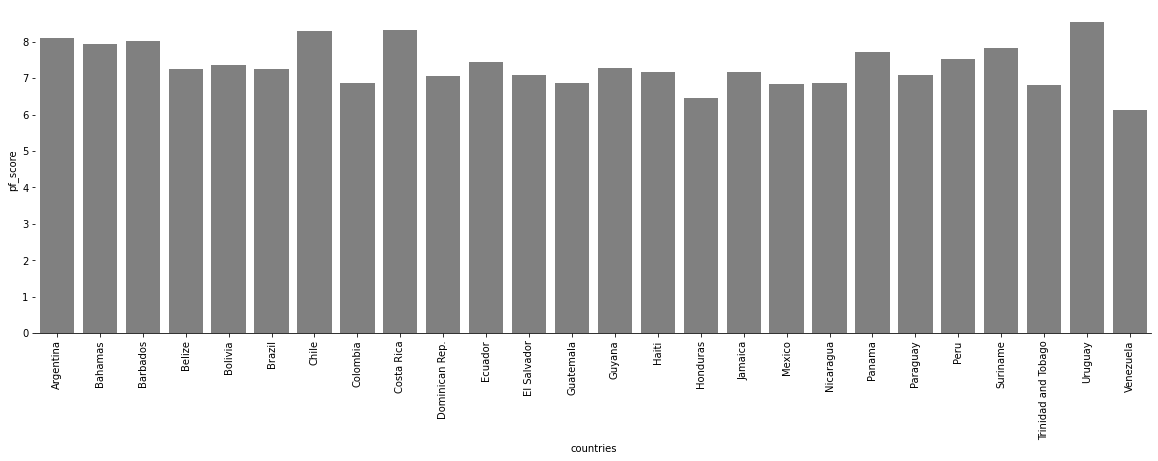

In [0]:
plt.figure(figsize=(20,6))
seaborn.barplot(data=df_latin,x='countries',y='pf_score', color='gray', ci=None)
plt.xticks(rotation=90)
seaborn.despine(left=True)

  3. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.

In [0]:
#Rango todo el data set
#Rango de una columna pf_score

_all_pf_identity_max = df_all.pf_identity.max()
_all_pf_identity_min = df_all.pf_identity.min()
_all_pf_identity_mean = df_all.pf_identity.mean()
_all_pf_identity_median = df_all.pf_identity.median()
_all_pf_identity_std = df_all.pf_identity.std()

_all_pf_score_max = df_all.pf_score.max()
_all_pf_score_min = df_all.pf_score.min()
_all_pf_score_mean = df_all.pf_score.mean()
_all_pf_score_median = df_all.pf_score.median()
_all_pf_score_std = df_all.pf_score.std()

print( f"Max: {_all_pf_identity_max}" )
print( f"Min: {_all_pf_identity_min}" )
print( f"Media: {_all_pf_identity_mean }" )
print( f"Mediana: {_all_pf_identity_median}" )
print( f"Desv. estandar: {_all_pf_identity_std}" )

print( f"Max: {_all_pf_score_max}" )
print( f"Min: {_all_pf_score_min}" )
print( f"Media: {_all_pf_score_mean }" )
print( f"Mediana: {_all_pf_score_median}" )
print( f"Desv. estandar: {_all_pf_score_std}" )
	

Max: 10.0
Min: 0.0
Media: 7.280649350649332
Mediana: 8.8
Desv. estandar: 3.1815770188081007
Max: 9.56
Min: 2.22
Media: 7.16340909090909
Mediana: 7.145
Desv. estandar: 1.3924086400335138


In [0]:
#Rango de dataset de latin america
#Rango de una columna pf_score

_latin_pf_identity_max = df_latin.pf_identity.max()
_latin_pf_identity_min = df_latin.pf_identity.min()
_latin_pf_identity_mean = df_latin.pf_identity.mean()
_latin_pf_identity_median = df_latin.pf_identity.median()
_latin_pf_identity_std = df_latin.pf_identity.std()

_latin_pf_score_max = df_latin.pf_score.max()
_latin_pf_score_min = df_latin.pf_score.min()
_latin_pf_score_mean = df_latin.pf_score.mean()
_latin_pf_score_median = df_latin.pf_score.median()
_latin_pf_score_std = df_latin.pf_score.std()

print( f"Max: {_latin_pf_identity_max}" )
print( f"Min: {_latin_pf_identity_min}" )
print( f"Media: {_latin_pf_identity_mean }" )
print( f"Mediana: {_latin_pf_identity_median}" )
print( f"Desv. estandar: {_latin_pf_identity_std}" )

print( f"Max: {_latin_pf_score_max}" )
print( f"Min: {_latin_pf_score_min}" )
print( f"Media: {_latin_pf_score_mean }" )
print( f"Mediana: {_latin_pf_score_median}" )
print( f"Desv. estandar: {_latin_pf_score_std}" )




Max: 10.0
Min: 4.2
Media: 8.582170542635659
Mediana: 10.0
Desv. estandar: 1.8758323542858797
Max: 8.82
Min: 5.03
Media: 7.34833333333334
Mediana: 7.29
Desv. estandar: 0.6338314820206699


In [0]:
#Rango de dataset de argentina
#Rango de una columna pf_score

_arg_pf_identity_max = df_argentina.pf_identity.max()
_arg_pf_identity_min = df_argentina.pf_identity.min()
_arg_pf_identity_mean = df_argentina.pf_identity.mean()
_arg_pf_identity_median = df_argentina.pf_identity.median()
_arg_pf_identity_std = df_argentina.pf_identity.std()

_arg_pf_score_max = df_argentina.pf_score.max()
_arg_pf_score_min = df_argentina.pf_score.min()
_arg_pf_score_mean = df_argentina.pf_score.mean()
_arg_pf_score_median = df_argentina.pf_score.median()
_arg_pf_score_std = df_argentina.pf_score.std()

print( f"Max: {_arg_pf_identity_max}" )
print( f"Min: {_arg_pf_identity_min}" )
print( f"Media: {_arg_pf_identity_mean }" )
print( f"Mediana: {_arg_pf_identity_median}" )
print( f"Desv. estandar: {_arg_pf_identity_std}" )

print( f"Max: {_arg_pf_score_max}" )
print( f"Min: {_arg_pf_score_min}" )
print( f"Media: {_arg_pf_score_mean }" )
print( f"Mediana: {_arg_pf_score_median}" )
print( f"Desv. estandar: {_arg_pf_score_std}" )



Max: 10.0
Min: 10.0
Media: 10.0
Mediana: 10.0
Desv. estandar: 0.0
Max: 8.2
Min: 7.92
Media: 8.1
Mediana: 8.105
Desv. estandar: 0.08589399151150082


In [0]:
_data = []
_data.append( {
    'zona':'argentina',
    'media': _arg_pf_identity_mean,
    'mediana': _arg_pf_identity_median,
    'std': _arg_pf_identity_std,
    'variable': 'pf_identity'

}  )
_data.append( {
    'zona':'argentina',
    'media': _arg_pf_score_mean,
    'mediana': _arg_pf_score_median,
    'std': _arg_pf_score_std,
    'variable': 'pf_score'

}  )

_data.append( {
    'zona':'mundo',
    'media': _all_pf_identity_mean,
    'mediana': _all_pf_identity_median,
    'std': _all_pf_identity_std,
    'variable': 'pf_identity'

}  )
_data.append( {
    'zona':'mundo',
    'media': _all_pf_score_mean,
    'mediana': _all_pf_score_median,
    'std': _all_pf_score_std,
    'variable': 'pf_score'

}  )


_data.append( {
    'zona':'latin',
    'media': _all_pf_identity_mean,
    'mediana': _all_pf_identity_median,
    'std': _all_pf_identity_std,
    'variable': 'pf_identity'

}  )
_data.append( {
    'zona':'latin',
    'media': _latin_pf_score_mean,
    'mediana': _latin_pf_score_median,
    'std': _latin_pf_score_std,
    'variable': 'pf_score'

}  )

df_json_arg = pandas.DataFrame.from_dict(_data)
df_json_arg

,zona,media,mediana,std,variable
0,argentina,10.000000,10.000,0.000000,pf_identity
1,argentina,8.100000,8.105,0.085894,pf_score
2,mundo,7.280649,8.800,3.181577,pf_identity
3,mundo,7.163409,7.145,1.392409,pf_score
4,latin,7.280649,8.800,3.181577,pf_identity
5,latin,7.348333,7.290,0.633831,pf_score


In [0]:
comparar_region = df_json_arg[df_json_arg.zona!='argentina']
comparar_region

,zona,media,mediana,std,variable
2,mundo,7.280649,8.800,3.181577,pf_identity
3,mundo,7.163409,7.145,1.392409,pf_score
4,latin,7.280649,8.800,3.181577,pf_identity
5,latin,7.348333,7.290,0.633831,pf_score


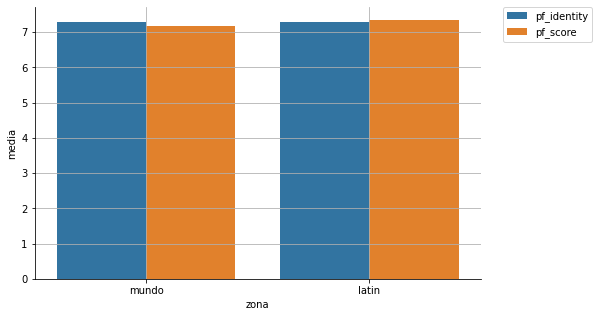

In [0]:
plt.figure(figsize=(8,5))
seaborn.barplot(data=comparar_region, x=comparar_region.zona,y=comparar_region.media ,hue=comparar_region.variable)
seaborn.despine()
plt.grid()

#leyenda de las lineas fuera del grafico
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [0]:
wide_dataset = df_json_arg.reset_index().pivot(index='variable', columns='zona',
                                                values='mediana')
wide_dataset

zona,argentina,latin,mundo
variable,,,
pf_identity,10.000,8.80,8.800
pf_score,8.105,7.29,7.145


4. ¿Tiene sentido calcular la moda?
*No tiene sentido calcular MODA, porque el set de datos no mide la cantidad de ocurrencias de una variable categórica*

5. ¿Cómo pueden sanearse los valores faltantes?
*Se pueden calcular con un promedio de años anteriores* 



6. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?

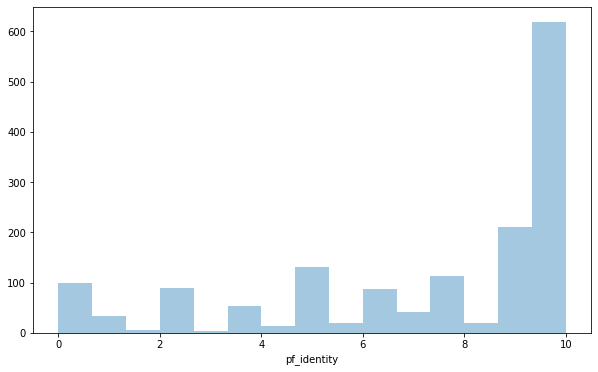

In [0]:
#Verifico outliers 
plt.figure(figsize=(10,6))
seaborn.distplot(df_all.pf_identity,bins=15, kde=False)

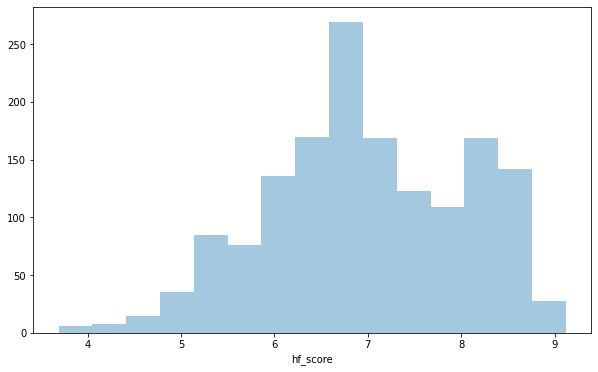

In [0]:
#Verifico outliers 
plt.figure(figsize=(10,6))
seaborn.distplot(df_all.hf_score,bins=15, kde=False)

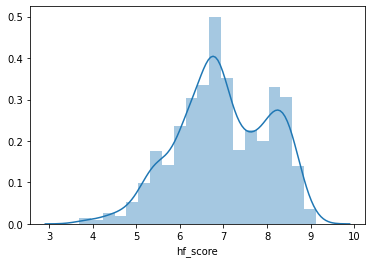

In [0]:
seaborn.distplot(df_all.hf_score,bins=20)

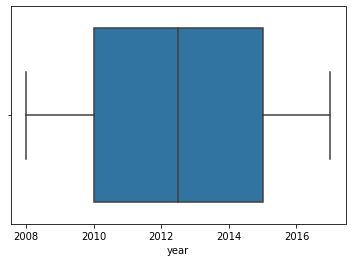

In [0]:
seaborn.boxplot(data= df_all['pf_identity'], x=df_all.year)


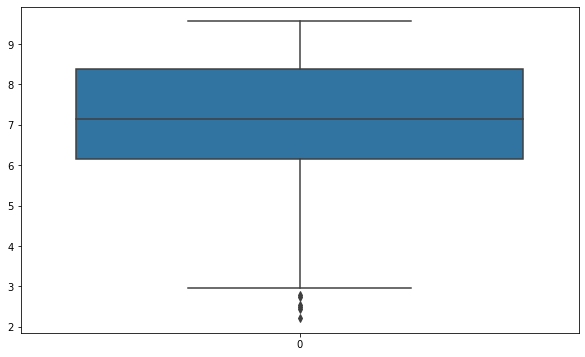

In [0]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=df_all['pf_score'])

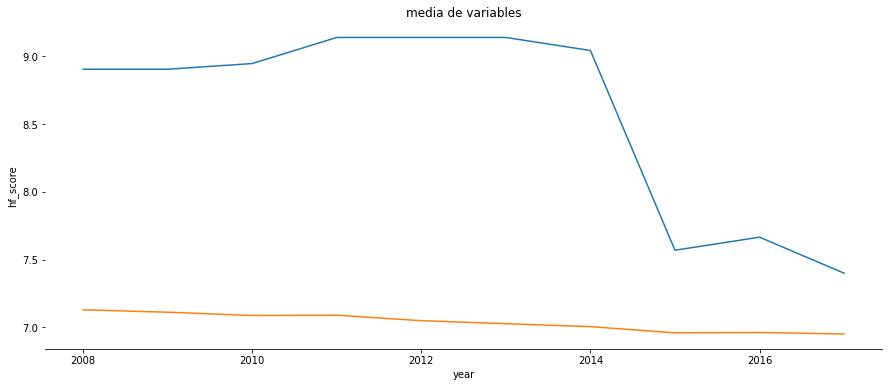

In [0]:
plt.figure(figsize=(15,6))
seaborn.lineplot(data=df_latin, x=df_latin.year,y=df_latin.pf_identity, ci=None, estimator=numpy.mean)
seaborn.lineplot(data=df_latin, x=df_latin.year,y=df_latin.hf_score, ci=None, estimator=numpy.mean)
plt.title("media de variables")
seaborn.despine(left=True)

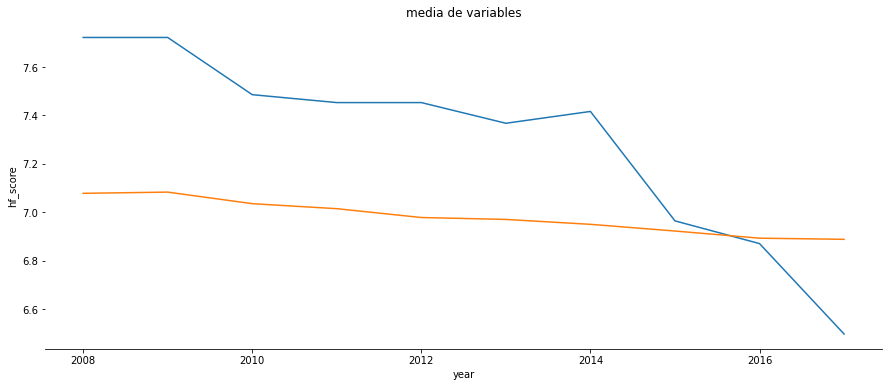

In [0]:
plt.figure(figsize=(15,6))
seaborn.lineplot(data=df_all, x=df_all.year,y=df_all.pf_identity, ci=None, estimator=numpy.mean)
seaborn.lineplot(data=df_all, x=df_all.year,y=df_all.hf_score, ci=None, estimator=numpy.mean)
plt.title("media de variables")
seaborn.despine(left=True)

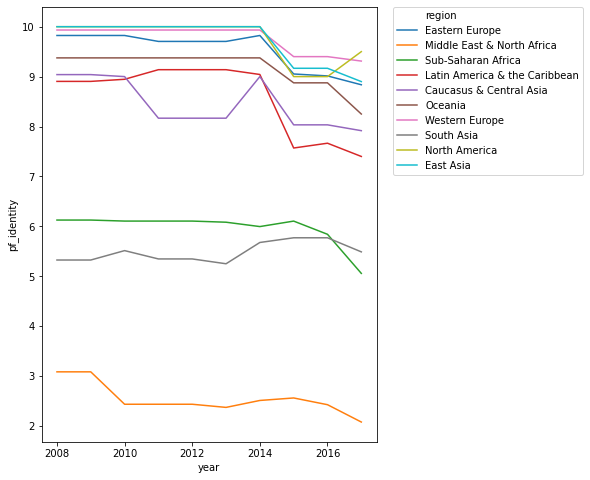

In [0]:
#2.2

plt.figure(figsize=(6,8))
seaborn.lineplot(data=df_all, x=df_all.year,y=df_all.pf_identity, ci=None, estimator=numpy.mean, hue=df_all.region)

#leyenda de las lineas fuera del grafico
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

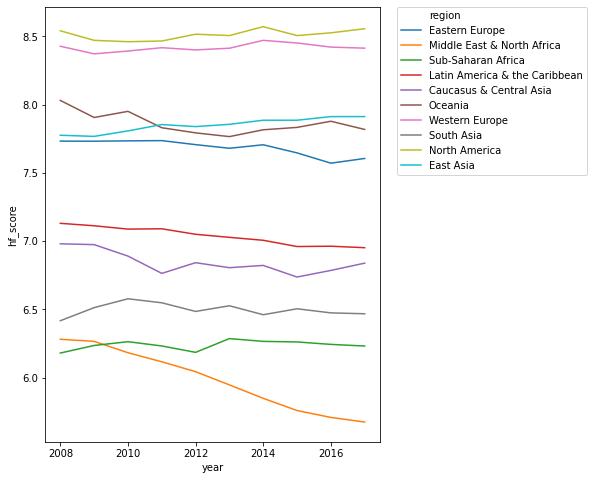

In [0]:
plt.figure(figsize=(6,8))
seaborn.lineplot(data=df_all, x=df_all.year,y=df_all.hf_score, ci=None, estimator=numpy.mean, hue=df_all.region)

#leyenda de las lineas fuera del grafico
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

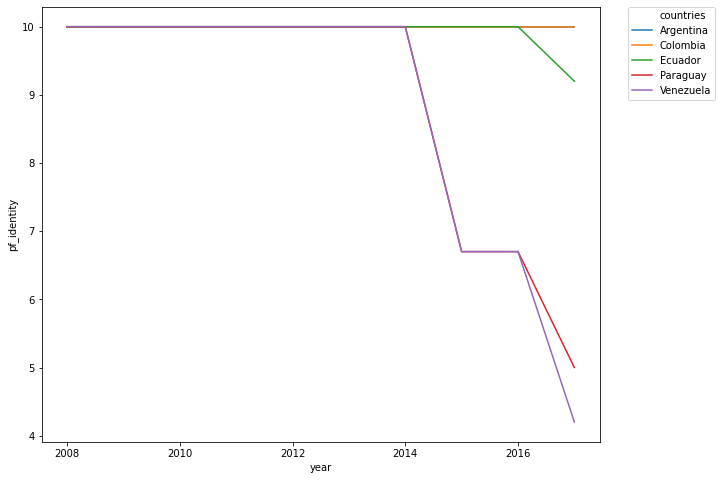

In [0]:
#2.2
df_paises = df_latin[df_latin.countries.isin(['Argentina', 'Venezuela', 'Paraguay', 'Colombia', 'Ecuador'])]

plt.figure(figsize=(10,8))
seaborn.lineplot(data=df_paises, x=df_paises.year,y=df_paises.pf_identity, ci=None, estimator=numpy.mean, hue=df_paises.countries)

#leyenda de las lineas fuera del grafico
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

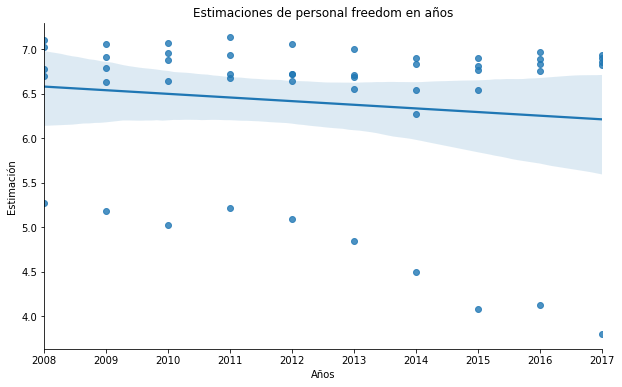

In [0]:


plt.figure(figsize=(10,6))
seaborn.regplot(data=df_paises, x='year',
                y='hf_score')
plt.ylabel('Estimación')
plt.xlabel('Años')
plt.title('Estimaciones de personal freedom en años')
seaborn.despine()



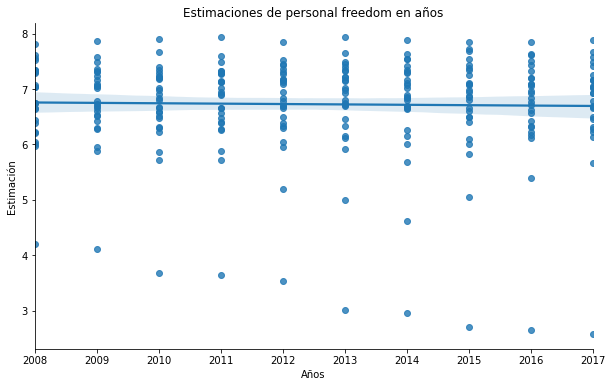

In [0]:


plt.figure(figsize=(10,6))
seaborn.regplot(data=df_latin, x='year',
                y='ef_score')
plt.ylabel('Estimación')
plt.xlabel('Años')
plt.title('Estimaciones de personal freedom en años')
seaborn.despine()


## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones? (hue = REGION)
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Pista: hay gráficos de seaborn que permiten generar visualizaciones para cada valor de una variable categórica, en este caso, las distintas regiones. (cat target= regions)

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?


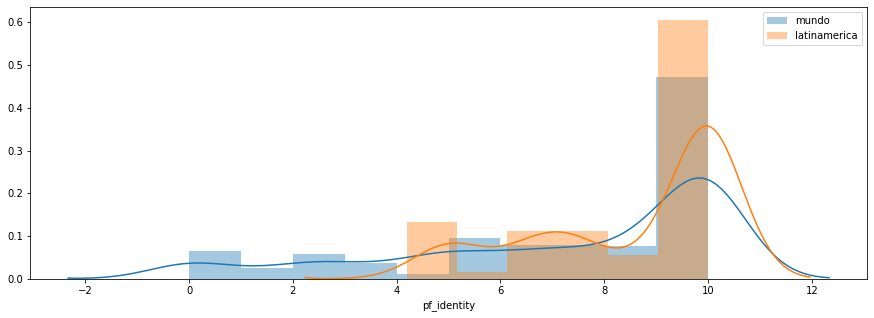

In [0]:
plt.figure(figsize=(15,5))
seaborn.distplot(df_all.pf_identity, label='mundo', bins=10)
seaborn.distplot(df_latin.pf_identity, label='latinamerica')
plt.legend()


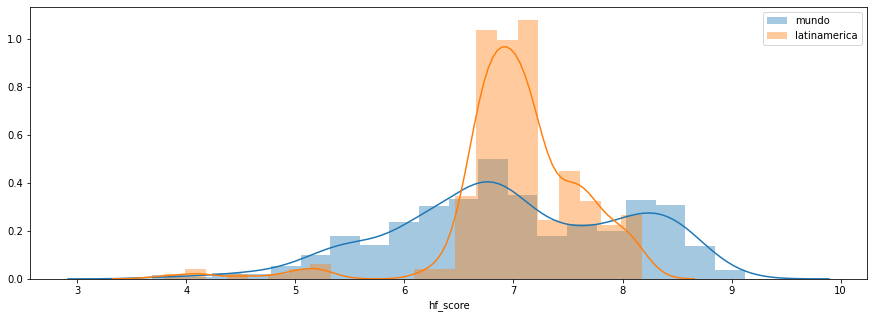

In [0]:
plt.figure(figsize=(15,5))
seaborn.distplot(df_all.hf_score, label='mundo')
seaborn.distplot(df_latin.hf_score, label='latinamerica')
plt.legend()


## 4. Correlaciones y Relaciones

En este ejercicio queremos responder a las preguntas

* Las libertades personales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, pf_score y ef_score. 

Como pf_indentity contribuye al cálculo de pf_score esperamos hallar algún grado de correlación. Lo contrario podría ocurrir con ef_score. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.
3. Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como `pandas.cut` o `pandas.dcut`. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.
4. Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.



In [0]:
#usuando metodo quantiles, devuelve
'''
Return values at the given quantile over requested axis.

Parameters

    qfloat or array-like, default 0.5 (50% quantile)

        Value between 0 <= q <= 1, the quantile(s) to compute.

'''
#df_all.pf_score.quantile(.75)
df_all.ef_score.max()

9.11

In [0]:
#funcion para cortar en segmentos en partes iguales de .33
segmentos = ['low', 'medium', 'high']


#considero que 10 es el valor máximo (podria ser el valor maximo de toda la serie 9.56)

q_33 = (.33*9.11)
q_66 = (.66*9.11)
q1 = 1




def get_label_segmento(valor):
    if valor > 0 and valor <= q_33:
        return segmentos[0]
    elif valor > q_33 and valor <= q_66:
        return segmentos[1]
    else:
        return segmentos[2]


def get_label_segmento_quartiles(valor, q33, q66):

    if valor > 0 and valor <= q33:
        return segmentos[0]
    elif valor > q33 and valor <= q66:
        return segmentos[1]
    else:
        return segmentos[2]



In [0]:
print(get_label_segmento_quartiles(7.1, df_latin.ef_score.quantile(.33), df_latin.ef_score.quantile(.66)  ))

6.64
7.1562
medium


In [0]:



df_argentina["pf_identity_segment"] = pandas.cut(df_argentina.pf_identity,  bins=3, labels=['low', 'medium', 'high'])
df_argentina["pf_score_segment"] = pandas.cut(df_argentina.pf_score,  bins=3, labels=['low', 'medium', 'high'])
df_argentina["ef_score_segment"] = pandas.cut(df_argentina.ef_score,  bins=3, labels=['low', 'medium', 'high'])


df_latin["pf_identity_segment"] = pandas.cut(df_latin.pf_identity,  bins=3, labels=['low', 'medium', 'high'])
df_latin["pf_score_segment"] = pandas.cut(df_latin.pf_score,  bins=3, labels=['low', 'medium', 'high'])
df_latin["ef_score_segment"] = pandas.cut(df_latin.ef_score,  bins=3, labels=['low', 'medium', 'high'])


df_all["pf_identity_segment"] = pandas.cut(df_all.pf_identity,  bins=3, labels=['low', 'medium', 'high'])
df_all["pf_score_segment"] = pandas.cut(df_all.pf_score,  bins=3, labels=['low', 'medium', 'high'])
df_all["ef_score_segment"] = pandas.cut(df_all.ef_score,  bins=3, labels=['low', 'medium', 'high'])

#pd.cut(np.array([1, 7, 5, 4, 6, 3]),
#       3, labels=["bad", "medium", "good"])
#[bad, good, medium, medium, good, bad]
#Categories (3, object): [bad < medium < good]


df_latin["pf_identity_segment_usr"] = df_latin.pf_identity.apply(lambda x: get_label_segmento(x))
df_latin["pf_score_segment_usr"] = df_latin.pf_score.apply(lambda x: get_label_segmento(x)) 
df_latin["ef_score_segment_usr"] = df_latin.ef_score.apply(lambda x: get_label_segmento(x))


df_latin["pf_identity_segment_usr_1"] = df_latin.pf_identity.apply(lambda x: get_label_segmento_quartiles(x, df_latin.pf_identity.quantile(.20), df_latin.pf_identity.quantile(.75)))
df_latin["pf_score_segment_usr_1"] = df_latin.pf_score.apply(lambda x: get_label_segmento_quartiles(x, df_latin.pf_score.quantile(.20), df_latin.pf_score.quantile(.75)) )
df_latin["ef_score_segment_usr_1"] = df_latin.ef_score.apply(lambda x: get_label_segmento_quartiles(x, df_latin.ef_score.quantile(.20), df_latin.ef_score.quantile(.75)))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [0]:
df = df_latin[['year','region', 'countries','ef_score', 'ef_score_segment', 'ef_score_segment_usr',  'ef_score_segment_usr_1']]
df.sort_values(by=['year','region','countries'], ascending=True)

,year,region,countries,ef_score,ef_score_segment,ef_score_segment_usr,ef_score_segment_usr_1
1551,2008,Latin America & the Caribbean,Argentina,6.01,medium,medium,low
1583,2008,Latin America & the Caribbean,Bahamas,7.61,high,high,high
1559,2008,Latin America & the Caribbean,Barbados,6.20,high,high,low
1564,2008,Latin America & the Caribbean,Belize,7.33,high,high,high
1530,2008,Latin America & the Caribbean,Bolivia,6.04,medium,high,low
...,...,...,...,...,...,...,...
118,2017,Latin America & the Caribbean,Peru,7.49,high,high,high
138,2017,Latin America & the Caribbean,Suriname,6.65,high,high,medium
148,2017,Latin America & the Caribbean,Trinidad and Tobago,6.70,high,high,medium
156,2017,Latin America & the Caribbean,Uruguay,7.05,high,high,medium


In [0]:
df = df_all[['year','region', 'countries','ef_score', 'ef_score_segment']]
df.sort_values(by=['year','region','countries'], ascending=True)

,year,region,countries,ef_score,ef_score_segment
1567,2008,Caucasus & Central Asia,Armenia,7.63,high
1517,2008,Caucasus & Central Asia,Azerbaijan,6.15,medium
1571,2008,Caucasus & Central Asia,Georgia,7.55,high
1541,2008,Caucasus & Central Asia,Kazakhstan,6.96,high
1524,2008,Caucasus & Central Asia,Kyrgyz Republic,6.74,medium
...,...,...,...,...,...
121,2017,Western Europe,Portugal,7.52,high
135,2017,Western Europe,Spain,7.55,high
139,2017,Western Europe,Sweden,7.56,high
140,2017,Western Europe,Switzerland,8.40,high


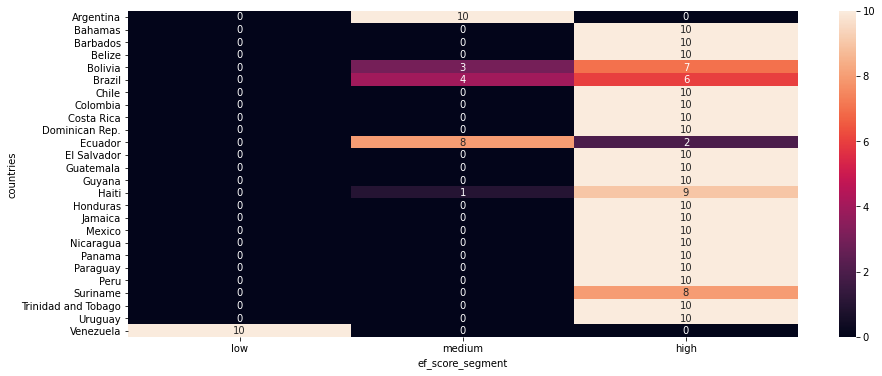

In [0]:
plt.figure(figsize=(15,6))
exp = pandas.crosstab(df_latin.countries, df_latin.ef_score_segment, dropna=True)
seaborn.heatmap(exp, annot=True)



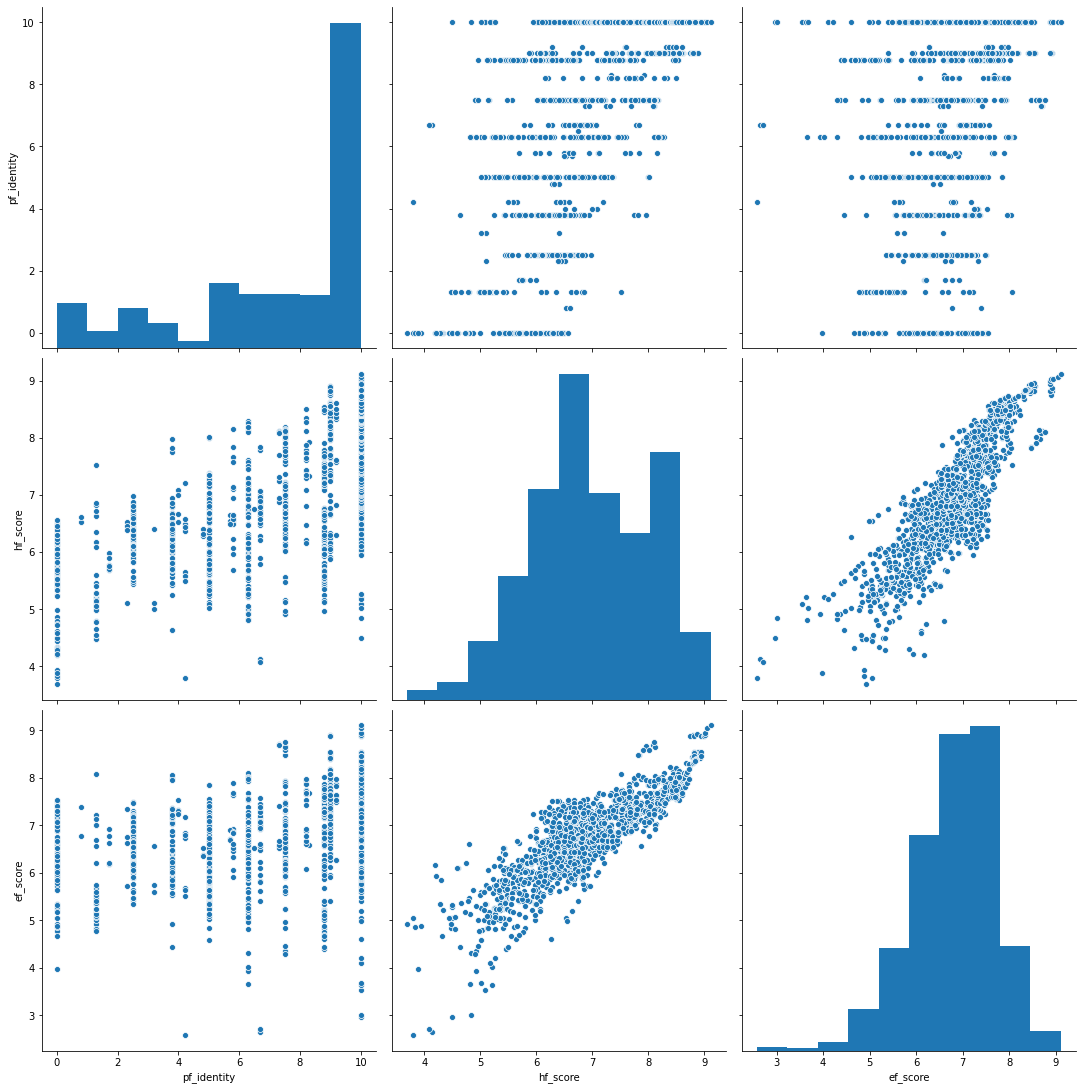

In [0]:
#pair plot
seaborn.pairplot(
    data=df_all,
    vars=['pf_identity', 'hf_score', 'ef_score'],
     height=5)
#plt.title("Comparación de variables")


(array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 8 Text major ticklabel objects>)

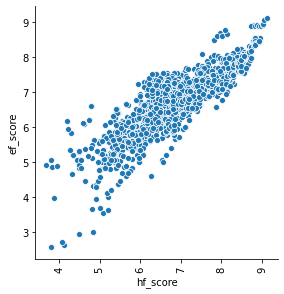

In [0]:

seaborn.pairplot(
    data=df_all,
    x_vars=[ 'hf_score'],
    y_vars=[ 'ef_score'],  
    height=4)
plt.xticks(rotation=90)


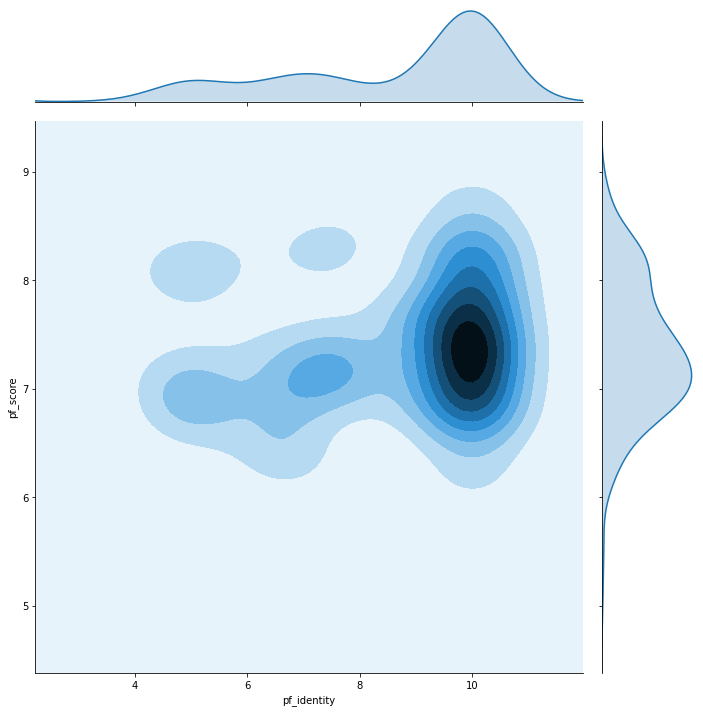

In [0]:
#otro grafico de correlacion de variables

seaborn.jointplot(data=df_latin, x='pf_identity',
                  y='pf_score', kind='kde', height=10)

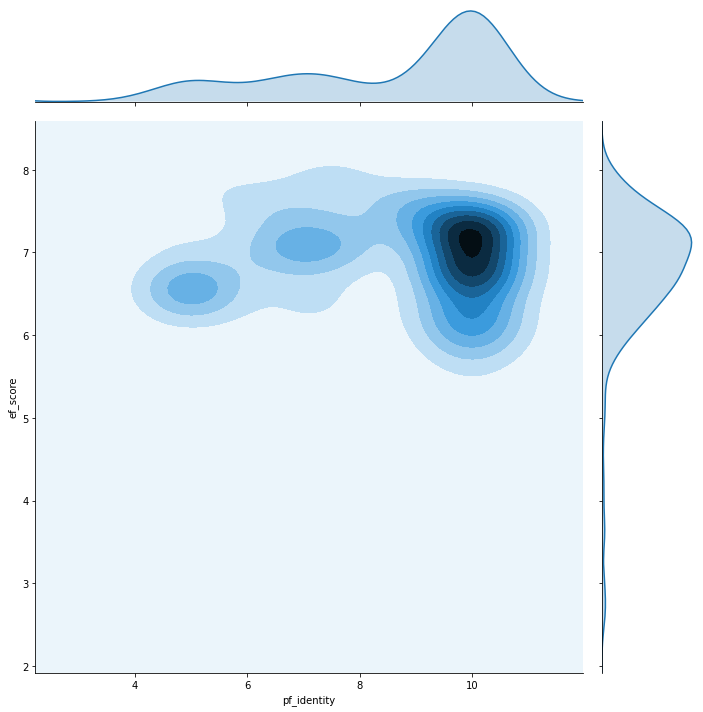

In [0]:
#otro grafico de correlacion de variables

seaborn.jointplot(data=df_latin, x='pf_identity',
                  y='ef_score', kind='kde', height=10)

# Parte 2

Luego del segundo fin de semana de clase, podemos revisitar nuestro trabajo anterior y completarlo respondiendo a las siguientes preguntas:

## 3. Distribuciones

2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

## 4. Correlaciones

3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el pf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros). Genere nuevas variables categóricas ordinales para calcular la correlación Tau de Kendal y genere una tabla de contingencia con esas nuevas variables.

Además de completar estos puntos faltantes, luego de haber visitado los conceptos de percepción visual y comunicación efectiva, están en condiciones de reveer los gráficos realizados y evaluar si pueden ser mejorados. Para ello, puede hacerse las siguientes preguntas:

* ¿Están utilizando el tipo de gráfico adecuado para cada tipo de variable?
* Los gráficos, ¿son legibles?
* Los gráficos generados, ¿responden a las preguntas mostrando un patrón claro? En caso de que no, ¿podemos filtrar los datos para que el patrón sea más evidente? ¿o agruparlos de manera distinta? ¿o cambiar el tipo de gráfico?